# Result of parallel BO with different number points in batch

According to former experiences, when q>=10 and calls to the Gaussian c.d.g become expensive. So in this experiment, i test the BO with 1-10 points under different iterations in one dataset.  Evaluation Criterions are **CPU Time** and **AUC score**. We should make a trade-off between those two Criterions.

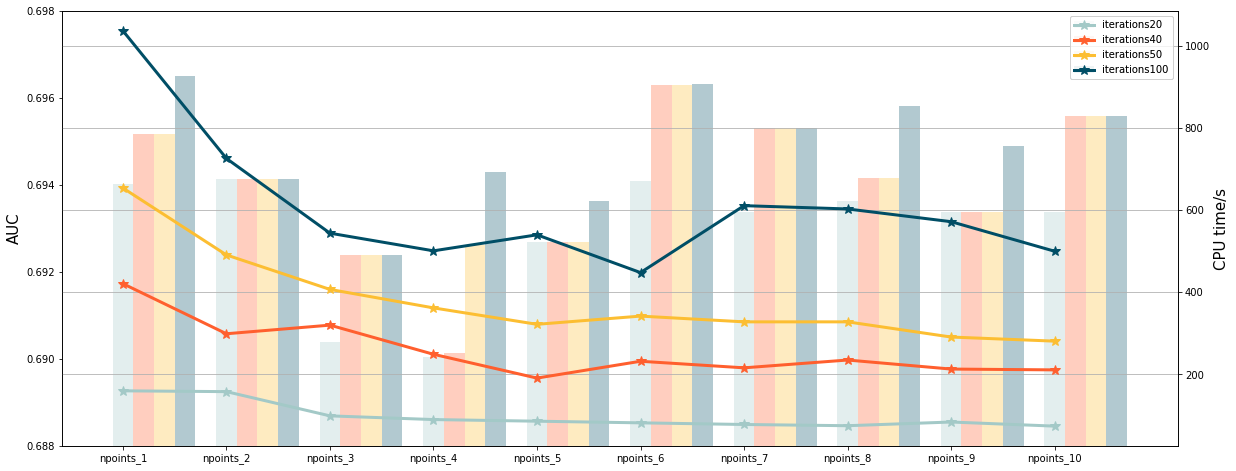

In [194]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
width = 0.2
x_1 = score
x_2 = score_2
x_3 = score_3
x_4 = score_4
y = range(1,11)
y = np.arange(len(y)) 
ax.bar(y,x_3,width,alpha = 0.3,label="iterations20",color="#a3c9c7")#,color='grey', edgecolor='black'
ax.bar(y+width,x_1,width,alpha = 0.3,label="iterations40",color="#ff5f2e")
ax.bar(y+2*width,x_2,width,alpha = 0.3,label="iterations50",color="#fcbe32")
ax.bar(y+3*width,x_4,width,alpha = 0.3,label="iterations100",color="#004e66")
ax.set_xticks(y +width/2)
ax.set_ylim((0.688, 0.698))
ax.set_ylabel('AUC',fontsize='15')
ax.set_xticks([])
ax.legend()

ax2 = ax.twinx()
ax2.plot(t_20['npoints'],t_20['cpu_time'], label="iterations20",marker='*',ms=10,lw=3,color="#a3c9c7")
ax2.plot(t_40['npoints'],t_40['cpu_time'],label="iterations40",marker ="*",ms=10,lw=3,color="#ff5f2e")
ax2.plot(t_50['npoints'],t_50['cpu_time'],label="iterations50",marker ="*",ms=10,lw=3,color="#fcbe32")
ax2.plot(t_100['npoints'],t_100['cpu_time'],label="iterations100",marker ="*",ms=10,lw=3,color="#004e66")
ax2.set_ylabel('CPU time/s',fontsize='15')
ax2.set_xlabel('n-points')
ax2.grid()
ax2.legend()
fig.show()
fig.savefig(DIRS['output']+'auc_compare_npoints_time.png', dpi=fig.dpi)


These charts show the differences CPU time and AUC score between BO with four number of iterations.In the chart the different color represent differen iterations. When we look at the CPU time, the general trend appears to be decreased, except for the iteration 100 when the points = 7 is slight increase. On the other hand, bath with 6 points overwhelmingly greater than the corresponding figure of others.

# prepare & load data

In [1]:
import numpy as np
import base64
import os
from os.path import join
import sys

def mprint(msg):
    from datetime import datetime
    """info"""
    cur_time = datetime.now().strftime('%m-%d %H:%M:%S')
    print(f"INFO  [{cur_time}] {msg}")

def Config_DIRS():

    if len(sys.argv) == 1:
        # default local
        ROOT_DIR = os.getcwd()
        DIRS = {
            'input': join(ROOT_DIR, 'data'),
            'output': join(ROOT_DIR, 'predictions'),
            'program': join(ROOT_DIR, 'ingestion_program'),
            'submission': join(ROOT_DIR, 'automl')
        }
    elif len(sys.argv) == 3:
        # default local
        ROOT_DIR = os.getcwd()
        DIRS = {
            'input': join(ROOT_DIR, 'data'),
            'output': join(ROOT_DIR, 'predictions'),
            'program': join(ROOT_DIR, 'ingestion_program'),
            'submission': join(ROOT_DIR, 'automl')
        }

    elif len(sys.argv) == 5:
        # run in codalab
        DIRS = {
            'input': sys.argv[1],
            'output': sys.argv[2],
            'program': sys.argv[3],
            'submission': sys.argv[4]
        }
    elif len(sys.argv) == 6 and sys.argv[1] == 'local':
        # full call in local
        DIRS = {
            'input': sys.argv[2],
            'output': sys.argv[3],
            'program': sys.argv[4],
            'submission': sys.argv[5]
        }
    else:
        raise ValueError("Wrong number of arguments")
    sys.path.append(DIRS['submission'])
    print(DIRS)
    return(DIRS)

DIRS = Config_DIRS()

import reader

info = {
	"table_sep" : ',',
	"target_name" : 'defects',
	"miss_values":'?'
}


datanames = [f for f in os.listdir(DIRS['input']) if not f.startswith('.')]
reader = reader.Reader(sep = info['table_sep'],
						miss_values=info['miss_values']
						)

for dataname in datanames:
        mprint(f'Read data: {dataname}')
        datapath = join(DIRS['input'], dataname)

data = reader.read_split([datapath], target_name=info['target_name'])
print(data.keys())



{'input': '/Users/caicai/Desktop/Masterarbeit/AutoML/Automl_Framework/data', 'output': '/Users/caicai/Desktop/Masterarbeit/AutoML/Automl_Framework/predictions', 'program': '/Users/caicai/Desktop/Masterarbeit/AutoML/Automl_Framework/ingestion_program', 'submission': '/Users/caicai/Desktop/Masterarbeit/AutoML/Automl_Framework/automl'}
INFO  [08-04 09:47:31] Read data: jm1.csv

Start [read_split]:
----Start [pre_clean]:

reading csv : jm1.csv ...
cleaning data ...
----End   [pre_clean]. Time elapsed: 5.35 sec.

> Number of common features : 21

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> % missing values on train set:
uniq_Opnd      0.0
uniq_Op        0.0
total_Opnd     0.0
total_Op       0.0
branchCount    0.0
dtype: float64

dropping columns with high missing rate >0.8...
> No need to dropping!

> Number of categorical features: 0
> Number of numeric

/Users/caicai/Desktop/Masterarbeit/AutoML/Automl_Framework/automl/reader.py:314: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train[path] = train[~is_null].drop(target_name, axis=1)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# optimisation

In [10]:
# Importing core libraries
import time
import pprint
import joblib
import pandas as pd

# Suppressing warnings because of skopt verbosity
import warnings
warnings.filterwarnings("ignore")

# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args  # decorator to convert a list of parameters to named arguments
from skopt.callbacks import DeadlineStopper  # Stop the optimization before running out of a fixed budget of time.
from skopt.callbacks import VerboseCallback  # Callback to control the verbosity
from skopt.callbacks import DeltaXStopper  # Stop the optimization If the last two positions at which the objective has been evaluated are less than delta

# import local function
from util import log, timeit, mprint, dump_result, load_result
from encoder import Categorical_encoder
from scaling import Scaler
from model import Classifier
from feature_selection import feature_selector


class Optimiser():

    """Optimises hyper-parameters
    - Estimator (classifier )
    Parameters
    ----------
    scoring : str, callable or None. default: None
        A string or a scorer callable object.
        If None, "auc" is used for classification
        Available scorings for classification : {"accuracy","roc_auc", "f1",
        "log_loss", "precision", "recall"}
    n_folds : int, default = 3
        The number of folds for cross validation (stratified for classification)
    random_state : int, default = 42
        Pseudo-random number generator state used for shuffling
    save_result : bool, default = False
        weather models be saved
    verbose : bool, default = True
        Verbose mode
    Return
    ----------
    final_result : dict, result for all surrogated models
        - final_result['GP'] 
        - final_result['RF'] 
    ----------
    Example
    ----------
    from skopt.space import Real, Categorical, Integer
    from optimisation import Optimiser

    optimiser = Optimiser()

    df_train = data['train'] #df_test = data['test']
    y = data['target'] #y_test = data['y_test']
    search_space_LGB = Classifier(strategy = "LightGBM").get_search_spaces()
    search_space_RF  = Classifier(strategy = "RandomForest").get_search_spaces()

    best_param,results = optimiser.optimise_step(space = [(search_space_LGB_fs,5),(search_space_RF,5)],
                                df_train=X_train,
                                df_target=y_train,
                                max_evals = 5,
                                set_callbacks=True)
    """

    def __init__(self, scoring=None,
                 n_folds=5,
                 random_state=42,
                 verbose=True,
                 to_path="save",
                 perform_scaling=True,
                 parallel_strategy=True):

        self.scoring = scoring
        self.n_folds = n_folds
        self.random_state = random_state
        self.verbose = verbose
        self.to_path = to_path
        self.perform_scaling = perform_scaling
        self.parallel_strategy = parallel_strategy

        if self.to_path is True:
            warnings.warn("Optimiser will save all your fitted models result ")

        self.cv = StratifiedKFold(n_splits=self.n_folds, shuffle=True, random_state=self.random_state)

        # Default scoring for classification
        if (self.scoring is None):
            self.scoring = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)

        elif (self.scoring == "log_loss"):
            self.scoring = 'log_loss'

        else:
            if (type(self.scoring) == str):
                if (self.scoring in ["accuracy", "roc_auc", "f1",
                                     "log_loss", "precision", "recall"]):
                    pass
                else:
                    warnings.warn("Invalid scoring metric. "
                                  "auc is used instead.")
                    self.scoring is None
            else:
                pass

    def get_params(self, deep=True):

        return {'scoring': self.scoring,
                'n_folds': self.n_folds,
                'random_state': self.random_state,
                'verbose': self.verbose,
                'save_result': self.save_result,
                'perform_scaling': self.perform_scaling,
                'parallel_strategy': self.parallel_strategy}

    def set_params(self, **params):

        self.__fitOK = False

        for k, v in params.items():
            if k not in self.get_params():
                warnings.warn("Invalid parameter a for optimiser Optimiser. "
                              "Parameter IGNORED. Check the list of available "
                              "parameters with `optimiser.get_params().keys()`")
            else:
                setattr(self, k, v)

    @timeit
    def optimise_step(self, space, df_train, df_target, max_evals=20, npoints=4, set_callbacks=True):
        """Evaluates the data.
        Build the pipeline. If no parameters are set, default configuration for
        each step is used
        Parameters
        ----------
        space : dict, default = None.
        df_train : pandas dataframe of shape = (n_train, n_features)
            The train dataset with numerical features.
        y_train : pandas series of shape = (n_train,)
            The numerical encoded target for classification tasks.
        max_evals : int, default = 20, max evaluation times
        set_callbacks (opt): bool,default: True
             If callable then callback(res) is called after each call to func. If list of callables, then each callable in the list is called.
        ----------
        Returns
        ---------
        result : dict
            - result['best_score'] : Best Score after Tuning
            - result['best_score_std'] : Standar Divation of best score
            - result['best_parmas'] : Best parameters
            - result['params'] : all paramsters (# = checked candicated)
            - result['time_cost(s)'] : total time of finding out the best parameters
            - result['all_cv_results'] : all cv results
            - result['mean_score_time'] : time for each cv result
        """
        # checke parallel strategy

        ce = Categorical_encoder()
        X = ce.fit_transform(df_train, df_target)

        if self.perform_scaling is True:
            scal = Scaler()
            X = scal.fit_transform(X, df_target)

        mid_result = {}
        tuning_result = {}

#        lgb = Classifier(strategy="LightGBM").get_estimator()
#        rf = Classifier(strategy="RandomForest").get_estimator()

        # Creating a correct space for skopt
        if (space is None):
            warnings.warn(
                "Space is empty. Please define a search space. "
                "Otherwise, call the method 'evaluate' for custom settings")
            return dict()

        else:

            if (len(space) == 0):
                warnings.warn(
                    "Space is empty. Please define a search space. "
                    "Otherwise, call the method 'evaluate' for custom settings")
                return dict()

            else:
                search_spaces = space

                # Initialize a pipeline
                fs = None
                for i in range(len(search_spaces)):
                    for p in search_spaces[i][0].keys():
                        if (p.startswith("fs__")):
                            fs = feature_selector()
                        else:
                            pass

                # Do we need to cache transformers?
                cache = False

                if (fs is not None):
                    if ("fs__strategy" in search_spaces):
                        if(search_spaces["fs__strategy"] != "variance"):
                            cache = True
                        else:
                            pass
                else:
                    pass
                mprint(f'Start turning Hyperparameters .... ')
                print("")
                print(">>> Categorical Features have encoded with :" + str({'strategy': ce.strategy}))
                print("")
                if self.perform_scaling is True:
                    print(">>> Numerical Features have encoded with :" + scal.__class__.__name__)
                    print("")

                for baseEstimator in ['GP', 'RF']:
                    # Pipeline creation

                    lgb = Classifier(strategy="LightGBM").get_estimator()
                  #  rf = Classifier(strategy="RandomForest").get_estimator()
                  #  svc = Classifier(strategy="SVC").get_estimator()

                    if (fs is not None):
                        if cache:
                            pipe = Pipeline([('fs', fs), ('model', lgb)], memory=self.to_path)
                        else:
                            pipe = Pipeline([('fs', fs), ('model', lgb)])
                    else:
                        if cache:
                            pipe = Pipeline([('model', lgb)], memory=self.to_path)
                        else:
                            pipe = Pipeline([('model', lgb)])

                    if (self.parallel_strategy is True):
                        opt = BayesSearchCV(pipe,
                                            search_spaces=search_spaces,
                                            scoring=self.scoring,
                                            cv=self.cv,
                                            n_points=npoints,
                                            n_jobs=-1,
                                            return_train_score=False,
                                            optimizer_kwargs={'base_estimator': baseEstimator,
                                                              "acq_func": "EI"},
                                            random_state=self.random_state,
                                            verbose=self.verbose)
                    else:
                        opt = BayesSearchCV(pipe,
                                            search_spaces=search_spaces,
                                            scoring=self.scoring,
                                            cv=self.cv,
                                            n_points=npoints,
                                            n_jobs=1,
                                            #         n_iter=max_evals,
                                            return_train_score=False,
                                            optimizer_kwargs={'base_estimator': baseEstimator,
                                                              "acq_func": "EIps"},
                                            random_state=self.random_state,
                                            verbose=self.verbose)

                    if set_callbacks is True:

                        mid_result = self.report_perf(opt, X, df_target, ' with Surrogate Model:' + baseEstimator,
                                                      callbacks=[DeltaXStopper(0.0001), DeadlineStopper(60 * 5)
                                                                 ])
                    else:
                        mid_result = self.report_perf(opt, X, df_target, ' with Surrogate Model: ' + baseEstimator,
                                                      )
                    tuning_result[baseEstimator] = mid_result

        bests = pd.DataFrame()
        for key in tuning_result.keys():
            if tuning_result[key]['best_score'] == max(d['best_score'] for d in tuning_result.values()):
                bests = bests.append({'best_score': tuning_result[key]['best_score'],
                                      'best_SM': key,
                                      'time': tuning_result[key]['CPU_Time']}, ignore_index=True)
                bests.sort_values(by=['time'])
                best_base_estimator = bests['best_SM'][0]
                best_param = tuning_result[best_base_estimator]['best_parmas']

        print("")
        print('######## Congratulations! Here is the Best Parameters: #######')
        print('Best Score is:', tuning_result[best_base_estimator]['best_score'])
        print('with Surrogate Model ' + best_base_estimator)
        pprint.pprint(best_param)
        return best_param, tuning_result

    # Define Call back function
    # def on_step(self, optim_result):
    #     score = opt.best_score_
    #     score_std = opt.cv_results_['std_test_score'][opt.best_index_]
    #     if score >= 0.99:
    #         print('Best Score >0.99,Interrupting!')
    #         return True

    # Reporting util for different optimizers
    def report_perf(self, optimizer, X, y, title, callbacks=None):
        """
        optimizer = a sklearn or a skopt optimizer
        X = the training set 
        y = our target
        title = a string label for the experiment
        """
        start = time.time()
        start_cpu = time.process_time()
        if callbacks:
            mprint(f'start tuning {title}...')

            optimizer.fit(X, y, callback=callbacks)
        else:
            mprint(f'start tuning {title}...')

            optimizer.fit(X, y)

        time_cost_CPU = time.process_time() - start_cpu
        time_cost = time.time() - start
        result = {}
        result['best_score'] = optimizer.best_score_
        result['best_score_std'] = optimizer.cv_results_['std_test_score'][optimizer.best_index_]
        result['best_parmas'] = optimizer.best_params_
        result['params'] = optimizer.cv_results_['params']
        result['CPU_Time'] = round(time_cost_CPU, 0)
        result['Time_cost'] = round(time_cost, 0)
        result['all_cv_results'] = optimizer.cv_results_['mean_test_score'][:]
        result['CV'] = optimizer.cv_results_
        print("")
#        print('>' + title + ':')
        time_cost_CPU = round(result['CPU_Time'], 0)
        time_cost = round(result['Time_cost'], 0)
        cand = len(result['all_cv_results'])
        best_cv = round(result['best_score'], 8)
        best_cv_sd = round(result['best_score_std'], 4)
        print(f'took CPU Time: {time_cost_CPU}s,clock time: {time_cost}, candidates checked:{cand} ,best CV score: {best_cv} \u00B1 {best_cv_sd}')
        print("")

        return result


## Parallel

In [74]:
from sklearn.model_selection import train_test_split
from skopt.space import Real, Categorical, Integer
#from optimisation_fs import Optimiser
from model import Classifier
import pandas as pd
from util import dump_result,load_result

df_train = data['train'] #df_test = data['test']
#df_train = pd.DataFrame(df_train)
y = data['target'] #y_test = data['y_test']

#X_train, X_val,y_train,y_val= train_test_split(df_train,y, test_size=0.6,random_state=42)
np_best_param = {}
np_results = {}
for n in range(1,11):
    nname = "npoints_"+str(n)
    print("")
    print(">>>>>> npoints:",n )
    optimiser = Optimiser(verbose=0,n_folds=5,parallel_strategy=True)
    search_space_LGB = Classifier(strategy = "LightGBM").get_search_spaces(need_feature_selection=False)
    search_space_SVC = Classifier(strategy = "SVC").get_search_spaces(need_feature_selection=False)

    best_param,results = optimiser.optimise_step( space = [(search_space_LGB,50),(search_space_SVC,50)],
                                                  df_train=df_train,
                                                  df_target=y,
                                                  set_callbacks=True,
                                                  npoints=n)
    
    np_best_param[nname] = best_param
    np_results[nname] = results
    
dump_result(np_results,"parallel_np_5f_50_eips",save_with_time=True)
dump_result(np_best_param,"best_param_5f_50_eips",save_with_time=True)


>>>>>> npoints: 1

Start [optimise_step]:
INFO  [07-20 19:14:49] Start turning Hyperparameters .... 

>>> Categorical Features have encoded with :{'strategy': 'label_encoding'}

>>> Numerical Features have encoded with :Scaler

INFO  [07-20 19:14:49] start tuning  with Surrogate Model:GP...

took CPU Time: 496.0s,clock time: 228.0, candidates checked:99 ,best CV score: 0.69285553 ± 0.0117

INFO  [07-20 19:18:37] start tuning  with Surrogate Model:RF...

took CPU Time: 158.0s,clock time: 158.0, candidates checked:100 ,best CV score: 0.69517059 ± 0.0128


######## Congratulations! Here is the Best Parameters: #######
Best Score is: 0.6951705862224818
with Surrogate Model RF
{'model': LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
        feature_fraction=0.6269410062950892, importance_type='split',
        is_unbalance=True, learning_rate=0.7549437155154509, max_bin=8701,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split


took CPU Time: 269.0s,clock time: 214.0, candidates checked:100 ,best CV score: 0.69630667 ± 0.0129

INFO  [07-20 19:47:23] start tuning  with Surrogate Model:RF...

took CPU Time: 73.0s,clock time: 97.0, candidates checked:100 ,best CV score: 0.6890559 ± 0.0074


######## Congratulations! Here is the Best Parameters: #######
Best Score is: 0.6963066728484417
with Surrogate Model GP
{'model': LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
        feature_fraction=1.0, importance_type='split', is_unbalance=False,
        learning_rate=1.0, max_bin=100, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=500,
        n_jobs=-1, nthread=-1, num_leaves=31, objective='binary',
        random_state=None, reg_alpha=1e-09, reg_lambda=1000.0, seed=0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
 'model__boosting_type': 'dart',
 'model__feature_fraction': 1.0,
 'model__is_

In [49]:
score = []
for k in np_results.keys():
    bests = pd.DataFrame()
    for key in np_results[k].keys():
        if np_results[k][key]['best_score'] == max(d['best_score'] for d in np_results[k].values()):
            bests = bests.append({'best_score': np_results[k][key]['best_score'],
                                  'best_SM': key,
                                  'time': np_results[k][key]['CPU_Time']}, ignore_index=True)
            bests.sort_values(by=['time'])
            best_base_estimator = bests['best_SM'][0]
    #print(np_results[k][best_base_estimator]['best_score'])
    score.append(np_results[k][best_base_estimator]['best_score'])
    

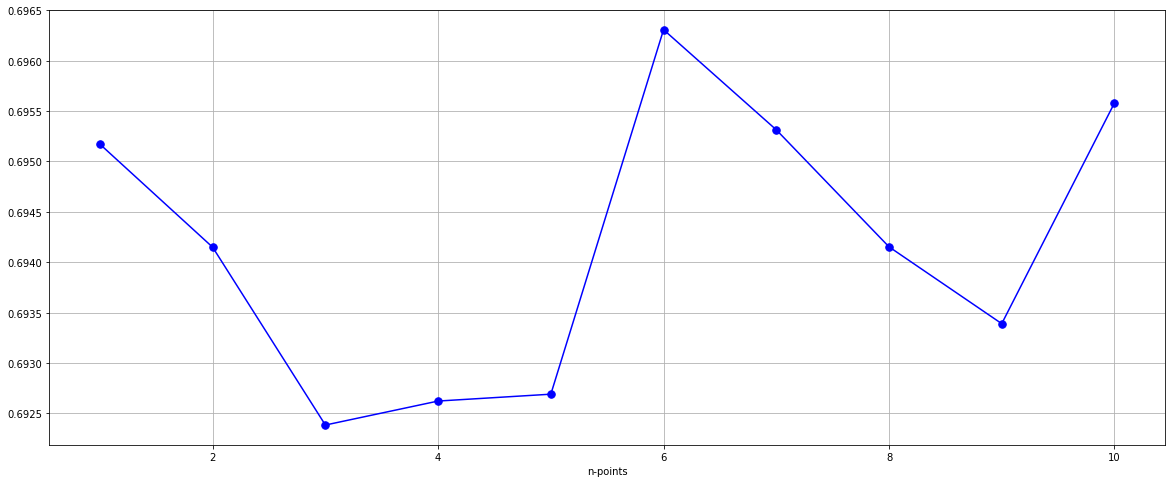

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
x_points = score
y = range(1,11)
p = ax.plot(y,x_points, 'b',marker =".",markersize = 15)
ax.set_xlabel('n-points')
plt.grid()
fig.show()

In [75]:
from sklearn.model_selection import train_test_split
from skopt.space import Real, Categorical, Integer
#from optimisation_fs import Optimiser
from model import Classifier
import pandas as pd
from util import dump_result,load_result

df_train = data['train'] #df_test = data['test']
#df_train = pd.DataFrame(df_train)
y = data['target'] #y_test = data['y_test']

#X_train, X_val,y_train,y_val= train_test_split(df_train,y, test_size=0.6,random_state=42)
np_best_param = {}
np_results = {}
for n in range(1,11):
    nname = "npoints_"+str(n)
    print("")
    print(">>>>>> npoints:",n )
    optimiser = Optimiser(verbose=0,n_folds=5,parallel_strategy=True)
    search_space_LGB = Classifier(strategy = "LightGBM").get_search_spaces(need_feature_selection=False)
    search_space_SVC = Classifier(strategy = "SVC").get_search_spaces(need_feature_selection=False)

    best_param,results = optimiser.optimise_step( space = [(search_space_LGB,20),(search_space_SVC,20)],
                                                  df_train=df_train,
                                                  df_target=y,
                                                  set_callbacks=True,
                                                  npoints=n)
    
    np_best_param[nname] = best_param
    np_results[nname] = results
    
dump_result(np_results,"parallel_np_5f_20_eips",save_with_time=True)
dump_result(np_best_param,"best_param_5f_20_eips",save_with_time=True)


>>>>>> npoints: 1

Start [optimise_step]:
INFO  [07-20 20:10:46] Start turning Hyperparameters .... 

>>> Categorical Features have encoded with :{'strategy': 'label_encoding'}

>>> Numerical Features have encoded with :Scaler

INFO  [07-20 20:10:46] start tuning  with Surrogate Model:GP...

took CPU Time: 96.0s,clock time: 63.0, candidates checked:40 ,best CV score: 0.69004015 ± 0.0128

INFO  [07-20 20:11:49] start tuning  with Surrogate Model:RF...

took CPU Time: 64.0s,clock time: 87.0, candidates checked:40 ,best CV score: 0.69402932 ± 0.0144


######## Congratulations! Here is the Best Parameters: #######
Best Score is: 0.6940293206601295
with Surrogate Model RF
{'model': LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
        feature_fraction=0.8729354091785828, importance_type='split',
        is_unbalance=True, learning_rate=0.38725411714951785, max_bin=8978,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gai


took CPU Time: 56.0s,clock time: 55.0, candidates checked:40 ,best CV score: 0.69408098 ± 0.0109

INFO  [07-20 20:21:38] start tuning  with Surrogate Model:RF...

took CPU Time: 26.0s,clock time: 53.0, candidates checked:40 ,best CV score: 0.68356247 ± 0.0045


######## Congratulations! Here is the Best Parameters: #######
Best Score is: 0.6940809753120538
with Surrogate Model GP
{'model': LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        feature_fraction=1.0, importance_type='split', is_unbalance=False,
        learning_rate=0.01, max_bin=100, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=500, n_jobs=-1, nthread=-1, num_leaves=31,
        objective='binary', random_state=None,
        reg_alpha=0.1120090455165699, reg_lambda=9.043771642335978, seed=0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
 'model__boosting_type': 'gbdt',
 'model__featur

In [80]:
from sklearn.model_selection import train_test_split
from skopt.space import Real, Categorical, Integer
#from optimisation_fs import Optimiser
from model import Classifier
import pandas as pd
from util import dump_result,load_result

df_train = data['train'] #df_test = data['test']
#df_train = pd.DataFrame(df_train)
y = data['target'] #y_test = data['y_test']

#X_train, X_val,y_train,y_val= train_test_split(df_train,y, test_size=0.6,random_state=42)
np_best_param = {}
np_results = {}
for n in range(1,11):
    nname = "npoints_"+str(n)
    print("")
    print(">>>>>> npoints:",n )
    optimiser = Optimiser(verbose=0,n_folds=5,parallel_strategy=True)
    search_space_LGB = Classifier(strategy = "LightGBM").get_search_spaces(need_feature_selection=False)
    search_space_SVC = Classifier(strategy = "SVC").get_search_spaces(need_feature_selection=False)

    best_param,results = optimiser.optimise_step( space = [(search_space_LGB,40),(search_space_SVC,40)],
                                                  df_train=df_train,
                                                  df_target=y,
                                                  set_callbacks=True,
                                                  npoints=n)
    
    np_best_param[nname] = best_param
    np_results[nname] = results
    
dump_result(np_results,"parallel_np_5f_40_eips",save_with_time=True)
dump_result(np_best_param,"best_param_5f_40_eips",save_with_time=True)


>>>>>> npoints: 1

Start [optimise_step]:
INFO  [07-20 20:32:17] Start turning Hyperparameters .... 

>>> Categorical Features have encoded with :{'strategy': 'label_encoding'}

>>> Numerical Features have encoded with :Scaler

INFO  [07-20 20:32:17] start tuning  with Surrogate Model:GP...

took CPU Time: 286.0s,clock time: 174.0, candidates checked:72 ,best CV score: 0.69285553 ± 0.0117

INFO  [07-20 20:35:11] start tuning  with Surrogate Model:RF...

took CPU Time: 135.0s,clock time: 168.0, candidates checked:80 ,best CV score: 0.69517059 ± 0.0128


######## Congratulations! Here is the Best Parameters: #######
Best Score is: 0.6951705862224818
with Surrogate Model RF
{'model': LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
        feature_fraction=0.6269410062950892, importance_type='split',
        is_unbalance=True, learning_rate=0.7549437155154509, max_bin=8701,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_


took CPU Time: 179.0s,clock time: 166.0, candidates checked:80 ,best CV score: 0.69630667 ± 0.0129

INFO  [07-20 20:58:13] start tuning  with Surrogate Model:RF...

took CPU Time: 53.0s,clock time: 78.0, candidates checked:80 ,best CV score: 0.68356247 ± 0.0045


######## Congratulations! Here is the Best Parameters: #######
Best Score is: 0.6963066728484417
with Surrogate Model GP
{'model': LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
        feature_fraction=1.0, importance_type='split', is_unbalance=False,
        learning_rate=1.0, max_bin=100, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=500,
        n_jobs=-1, nthread=-1, num_leaves=31, objective='binary',
        random_state=None, reg_alpha=1e-09, reg_lambda=1000.0, seed=0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
 'model__boosting_type': 'dart',
 'model__feature_fraction': 1.0,
 'model__is_u

In [83]:
from sklearn.model_selection import train_test_split
from skopt.space import Real, Categorical, Integer
#from optimisation_fs import Optimiser
from model import Classifier
import pandas as pd
from util import dump_result,load_result

df_train = data['train'] #df_test = data['test']
#df_train = pd.DataFrame(df_train)
y = data['target'] #y_test = data['y_test']

#X_train, X_val,y_train,y_val= train_test_split(df_train,y, test_size=0.6,random_state=42)
np_best_param = {}
np_results = {}
for n in range(1,11):
    nname = "npoints_"+str(n)
    print("")
    print(">>>>>> npoints:",n )
    optimiser = Optimiser(verbose=0,n_folds=5,parallel_strategy=True)
    search_space_LGB = Classifier(strategy = "LightGBM").get_search_spaces(need_feature_selection=False)
    search_space_SVC = Classifier(strategy = "SVC").get_search_spaces(need_feature_selection=False)

    best_param,results = optimiser.optimise_step( space = [(search_space_LGB,100),(search_space_SVC,100)],
                                                  df_train=df_train,
                                                  df_target=y,
                                                  set_callbacks=True,
                                                  npoints=n)
    
    np_best_param[nname] = best_param
    np_results[nname] = results
    
dump_result(np_results,"parallel_np_5f_100_eips",save_with_time=False)
#dump_result(np_best_param,"best_param_5f_40_eips",save_with_time=True)


>>>>>> npoints: 1

Start [optimise_step]:
INFO  [07-20 21:38:22] Start turning Hyperparameters .... 

>>> Categorical Features have encoded with :{'strategy': 'label_encoding'}

>>> Numerical Features have encoded with :Scaler

INFO  [07-20 21:38:22] start tuning  with Surrogate Model:GP...

took CPU Time: 735.0s,clock time: 292.0, candidates checked:77 ,best CV score: 0.69651048 ± 0.0122

INFO  [07-20 21:43:15] start tuning  with Surrogate Model:RF...

took CPU Time: 302.0s,clock time: 289.0, candidates checked:144 ,best CV score: 0.69517059 ± 0.0128


######## Congratulations! Here is the Best Parameters: #######
Best Score is: 0.6965104818572971
with Surrogate Model GP
{'model': LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
        feature_fraction=1.0, importance_type='split', is_unbalance=False,
        learning_rate=1.0, max_bin=100, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=500,
        n


took CPU Time: 297.0s,clock time: 270.0, candidates checked:78 ,best CV score: 0.6963241 ± 0.0094

INFO  [07-20 22:27:04] start tuning  with Surrogate Model:RF...

took CPU Time: 151.0s,clock time: 238.0, candidates checked:200 ,best CV score: 0.69025525 ± 0.0077


######## Congratulations! Here is the Best Parameters: #######
Best Score is: 0.6963241029295401
with Surrogate Model GP
{'model': LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
        feature_fraction=0.6064672248688228, importance_type='split',
        is_unbalance=False, learning_rate=1.0, max_bin=100, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=341, n_jobs=-1, nthread=-1, num_leaves=31,
        objective='binary', random_state=None, reg_alpha=1e-09,
        reg_lambda=1000.0, seed=0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
 'model__boosting_type': 'dart',
 'model__feature_fraction': 0

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


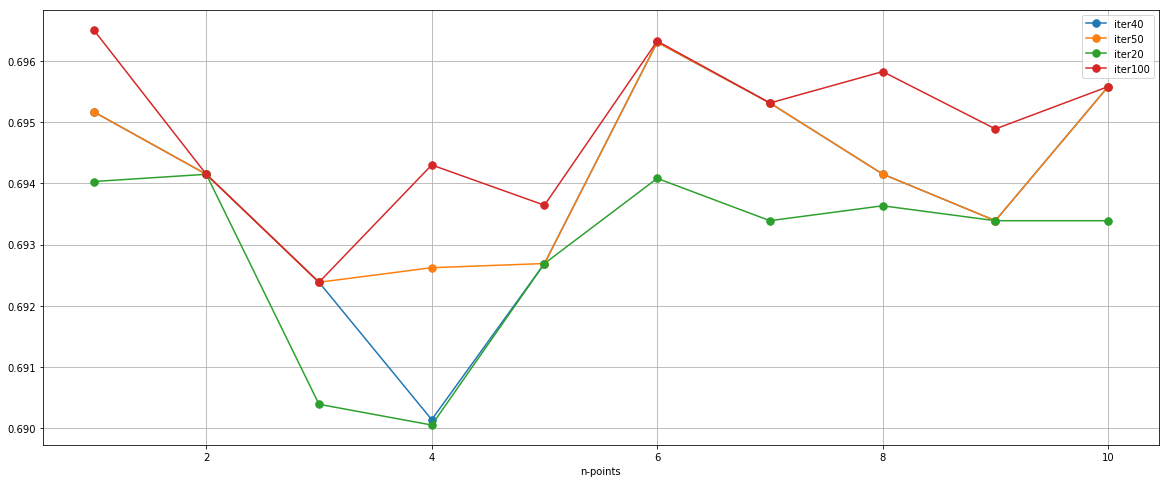

In [80]:
from util import dump_result,load_result
import pandas as pd
np_results =load_result("jm1_parallel_np_5f_40_eips_20190720211433.json")
score = []
for k in np_results.keys():
    bests = pd.DataFrame()
    for key in np_results[k].keys():
        if np_results[k][key]['best_score'] == max(d['best_score'] for d in np_results[k].values()):
            bests = bests.append({'best_score': np_results[k][key]['best_score'],
                                  'best_SM': key,
                                  'time': np_results[k][key]['CPU_Time']}, ignore_index=True)
            bests.sort_values(by=['time'])
            best_base_estimator = bests['best_SM'][0]
    #print(np_results[k][best_base_estimator]['best_score'])
    score.append(np_results[k][best_base_estimator]['best_score'])

re =load_result("jm1_parallel_np_5f_50_eips_20190720201017.json")
score_2 = []
for k in re.keys():
    bests = pd.DataFrame()
    for key in re[k].keys():
        if re[k][key]['best_score'] == max(d['best_score'] for d in re[k].values()):
            bests = bests.append({'best_score': re[k][key]['best_score'],
                                  'best_SM': key,
                                  'time': re[k][key]['CPU_Time']}, ignore_index=True)
            bests.sort_values(by=['time'])
            best_base_estimator = bests['best_SM'][0]
    score_2.append(re[k][best_base_estimator]['best_score'])

    
re_20 =load_result("jm1_parallel_np_5f_20_eips_20190720202853.json")
score_3 = []
for k in re_20.keys():
    bests = pd.DataFrame()
    for key in re_20[k].keys():
        if re_20[k][key]['best_score'] == max(d['best_score'] for d in re_20[k].values()):
            bests = bests.append({'best_score': re_20[k][key]['best_score'],
                                  'best_SM': key,
                                  'time': re_20[k][key]['CPU_Time']}, ignore_index=True)
            bests.sort_values(by=['time'])
            best_base_estimator = bests['best_SM'][0]
    score_3.append(re_20[k][best_base_estimator]['best_score'])
    

re_100 =load_result("jm1_parallel_np_5f_100_eips.json")
score_4 = []
for k in re_100.keys():
    bests = pd.DataFrame()
    for key in re_100[k].keys():
        if re_100[k][key]['best_score'] == max(d['best_score'] for d in re_100[k].values()):
            bests = bests.append({'best_score': re_100[k][key]['best_score'],
                                  'best_SM': key,
                                  'time': re_100[k][key]['CPU_Time']}, ignore_index=True)
            bests.sort_values(by=['time'])
            best_base_estimator = bests['best_SM'][0]
    score_4.append(re_100[k][best_base_estimator]['best_score'])
    
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
x_1 = score
x_2 = score_2
x_3 = score_3
x_4 = score_4
y = range(1,11)
p = ax.plot(y,x_1,label="iter40",marker =".",markersize = 15)
p_2 = ax.plot(y,x_2,label="iter50" ,marker ="." ,markersize = 15)
p_3 = ax.plot(y,x_3,label="iter20" ,marker =".",markersize = 15)
p_4 = ax.plot(y,x_4,label="iter100" ,marker =".",markersize = 15)
ax.set_xlabel('n-points')
plt.grid()
plt.legend()
fig.show()
fig.savefig(DIRS['output']+'auc_compare_npoints.png', dpi=fig.dpi)

In [70]:
def get_runtime(results):
    time_all = {}
    for k in results.keys():
        temp=[]
        #print(k)
        for b in results[k].keys():
            temp.append(results[k][b]["CPU_Time"])
            time_all[k]=sum(temp)
    return pd.DataFrame(list(time_all.items()), columns=['npoints', 'cpu_time'])
t_20 = get_runtime(re_20)
t_40 = get_runtime(np_results)
t_50 = get_runtime(re) 
t_100 = get_runtime(re_100)

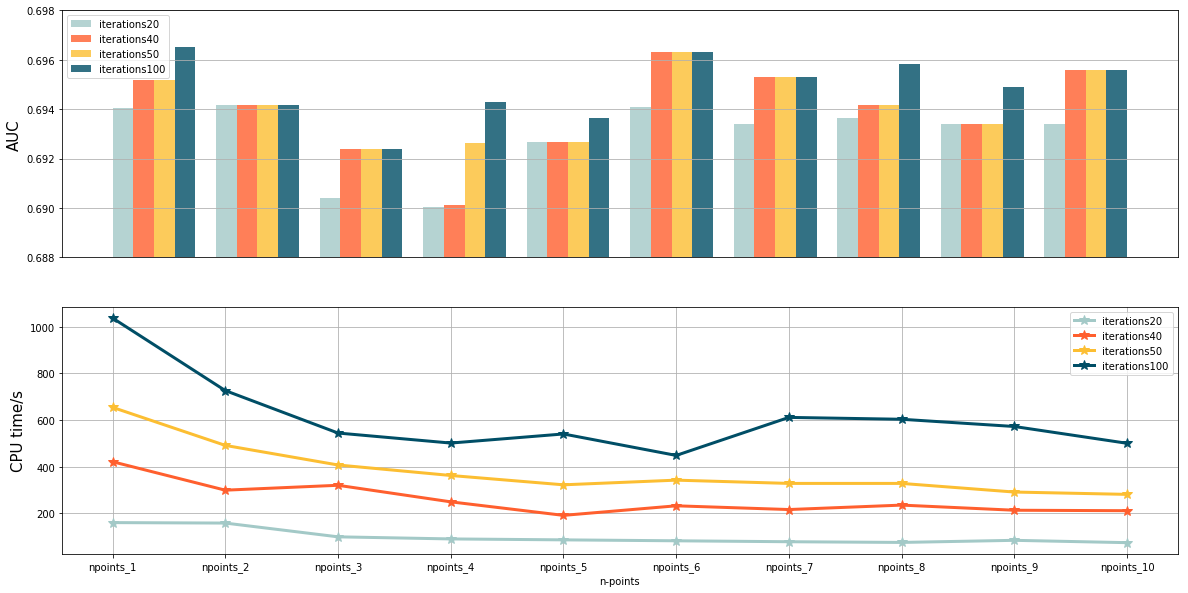

In [182]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211)
width = 0.2
x_1 = score
x_2 = score_2
x_3 = score_3
x_4 = score_4
y = range(1,11)
y = np.arange(len(y)) 
ax.bar(y,x_3,width,alpha = 0.8,label="iterations20",color="#a3c9c7")#,color='grey', edgecolor='black'
ax.bar(y+width,x_1,width,alpha = 0.8,label="iterations40",color="#ff5f2e")
ax.bar(y+2*width,x_2,width,alpha =0.8,label="iterations50",color="#fcbe32")
ax.bar(y+3*width,x_4,width,alpha = 0.8,label="iterations100",color="#004e66")
ax.set_xticks(y +width/2)
ax.set_ylim((0.688, 0.698))
ax.set_ylabel('AUC',fontsize='15')
ax.set_xticks([])
ax.legend()
ax.grid()


ax2 = fig.add_subplot(212)  # 这个很重要噢
ax2.plot(t_20['npoints'],t_20['cpu_time'], label="iterations20",marker='*',ms=10,lw=3,color="#a3c9c7")
ax2.plot(t_40['npoints'],t_40['cpu_time'],label="iterations40",marker ="*",ms=10,lw=3,color="#ff5f2e")
ax2.plot(t_50['npoints'],t_50['cpu_time'],label="iterations50",marker ="*",ms=10,lw=3,color="#fcbe32")
ax2.plot(t_100['npoints'],t_100['cpu_time'],label="iterations100",marker ="*",ms=10,lw=3,color="#004e66")
ax2.set_ylabel('CPU time/s',fontsize='15')
ax2.legend()
ax2.set_xlabel('n-points')
ax2.grid()
fig.show()
#fig.savefig(DIRS['output']+'auc_compare_npoints.png', dpi=fig.dpi)
